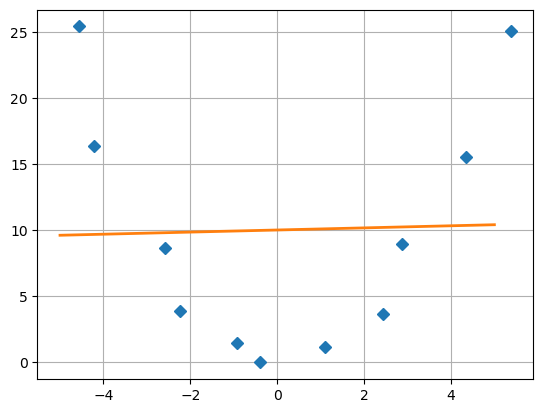

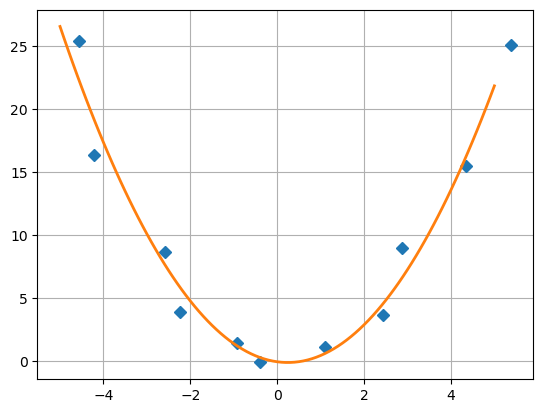

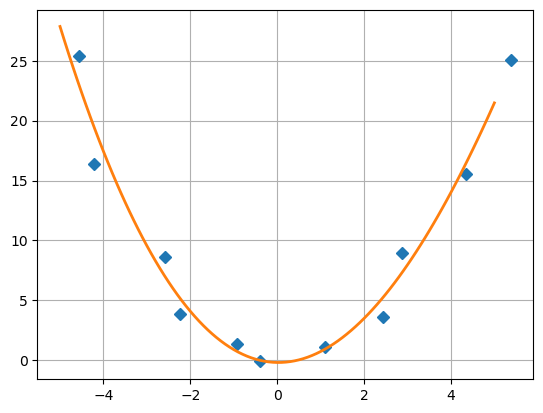

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def polynom_approximation(deg):
    terms = tuple(x**i for i in range(deg, 0, -1))
    terms = terms + tuple([np.ones(11)])
    m = np.vstack(terms).T
    s = np.linalg.lstsq(m, y, rcond = None)[0]

    x_prec = np.linspace(-5, 5, 101)
    appr = sum(s[i] * x_prec**(deg - i) for i in range(0, deg + 1))
    
    plt.plot(x, y, 'D')
    plt.plot(x_prec, appr, '-', lw=2)
    plt.grid()
    plt.show()

delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2 + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

polynom_approximation(1)
polynom_approximation(2)
polynom_approximation(3)

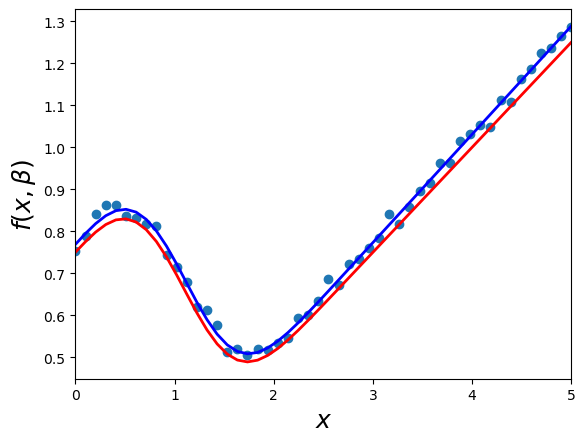

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 * x + b1 * np.exp(-b2 * x**3)
    
xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

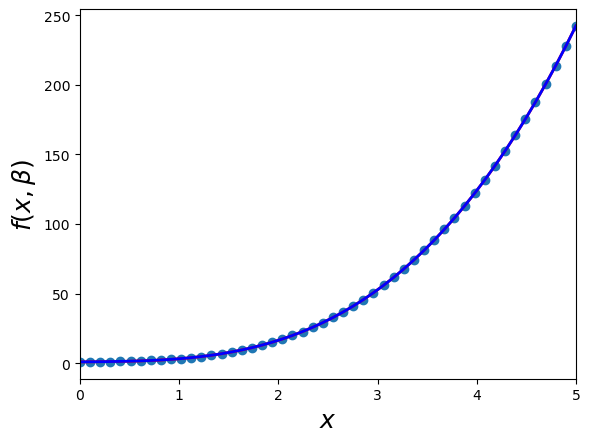

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

beta = (1, 0.75, -0.5, 2)
def f(x, b0, b1, b2, b3):
    return b0 + b1 * x + b2 * x**2 + b3 * x**3
    
xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

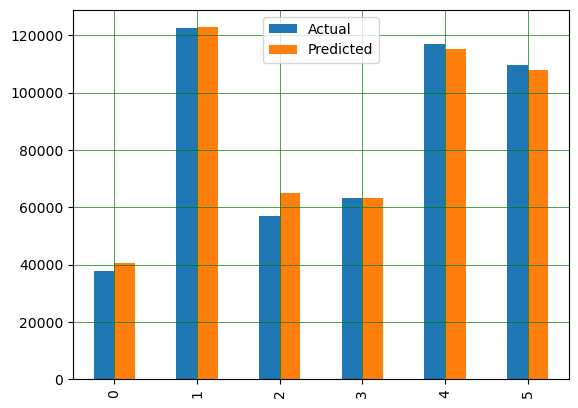

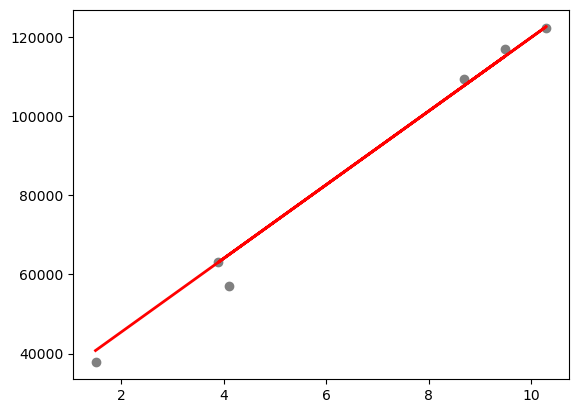

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('data/salary_data.csv')

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(x_test, y_test, color='grey')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

dataset

In [29]:
import pandas as pd
from sklearn import metrics

dataset = pd.read_csv('data/wine.csv')

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

#coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
#coeff_df

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

df

Mean Squared Error: 3.011988562305177e-29


,Actual,Predicted
0,0.470,0.470
1,0.820,0.820
2,0.290,0.290
3,0.645,0.645
4,0.450,0.450
...,...,...
315,0.270,0.270
316,0.390,0.390
317,0.340,0.340
318,0.765,0.765


Coefficients: [-1.28571429  8.66666667]
MSE: 1.9460317460317456


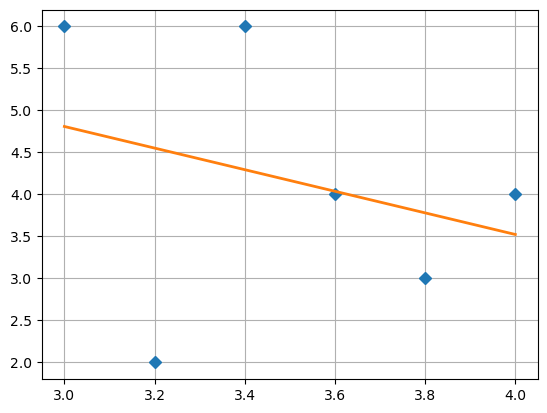

Coefficients: [  2.23214286 -16.91071429  35.75      ]
MSE: 1.8964285714285742


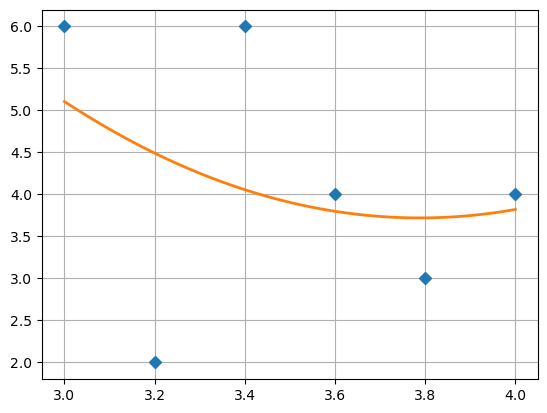

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def polynom_approximation(x, y, deg):
    terms = tuple(x**i for i in range(deg, 0, -1))
    terms = terms + tuple([np.ones(6)])
    m = np.vstack(terms).T
    s = np.linalg.lstsq(m, y, rcond = None)[0]

    x_prec = np.linspace(3, 4, 100)
    appr = sum(s[i] * x_prec**(deg - i) for i in range(0, deg + 1))
    
    print('Coefficients:', s)
    mse = (sum(s[i] * x**(deg - i) for i in range(0, deg + 1)) - y)**2
    mse = np.average(mse)
    print('MSE:', mse)
    
    plt.plot(x, y, 'D')
    plt.plot(x_prec, appr, '-', lw=2)
    plt.grid()
    plt.show()

x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([6.0, 2.0, 6.0, 4.0, 3.0, 4.0])

polynom_approximation(x, y, 1)
polynom_approximation(x, y, 2)